In [52]:
import data
import utilities
import matplotlib.dates as mdates
from datetime import datetime, time
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO



In [53]:
fortaleza_high_tide_csv = data.get_fortaleza_high_tide_csv()
fortaleza_low_tide_csv = data.get_fortaleza_low_tide_csv()
moon_phase_csv = data.get_moon_phase_csv()
nate_and_soph_csv = data.nate_and_soph_csv_test
surf_camp_csv = data.surf_camp_csv

print(fortaleza_high_tide_csv)

High Tide Time,High Tide Value
2024-10-01 04:00 ,7.57
2024-10-01 16:15 ,7.70
2024-10-02 04:31 ,7.86
2024-10-02 16:43 ,7.98
2024-10-03 05:00 ,8.05
2024-10-03 17:11 ,8.16
2024-10-04 05:29 ,8.10
2024-10-04 17:38 ,8.22
2024-10-05 05:59 ,8.04
2024-10-05 18:06 ,8.17
2024-10-06 06:29 ,7.84
2024-10-06 18:37 ,8.00
2024-10-07 07:02 ,7.52
2024-10-07 19:10 ,7.70
2024-10-08 07:41 ,7.10
2024-10-08 19:50 ,7.30
2024-10-09 08:28 ,6.61
2024-10-09 20:41 ,6.82
2024-10-10 09:33 ,6.16
2024-10-10 21:54 ,6.39
2024-10-11 11:05 ,5.97
2024-10-11 23:33 ,6.29
2024-10-12 12:39 ,6.27
2024-10-13 01:04 ,6.68
2024-10-13 13:48 ,6.90
2024-10-14 02:10 ,7.31
2024-10-14 14:40 ,7.61
2024-10-15 03:02 ,7.94
2024-10-15 15:24 ,8.25
2024-10-16 03:47 ,8.44
2024-10-16 16:05 ,8.74
2024-10-17 04:29 ,8.73
2024-10-17 16:43 ,9.01
2024-10-18 05:09 ,8.77
2024-10-18 17:21 ,9.04
2024-10-19 05:48 ,8.56
2024-10-19 17:58 ,8.84
2024-10-20 06:27 ,8.15
2024-10-20 18:36 ,8.43
2024-10-21 07:07 ,7.59
2024-10-21 19:16 ,7.86
2024-10-22 07:51 ,6.95
202

In [54]:
df_moon = pd.read_csv(StringIO(moon_phase_csv), parse_dates=['Date'])
df_fortaleza_high_tide = pd.read_csv(StringIO(fortaleza_high_tide_csv), parse_dates=['High Tide Time'])
df_fortaleza_low_tide = pd.read_csv(StringIO(fortaleza_low_tide_csv), parse_dates=['Low Tide Time'])
df_nate_and_soph = pd.read_csv(StringIO(nate_and_soph_csv), parse_dates=['Date'])
df_surf_camp = pd.read_csv(StringIO(surf_camp_csv), parse_dates=['Date'])

In [55]:
# copy df_fortaleza_high_tide to df_ilha_do_guajiru_high_tide
df_ilha_do_guajiru_high_tide = df_fortaleza_high_tide.copy()

# shift df_ilha_do_guajiru_high_tide['High Tide Time'] by 20 minutes
df_ilha_do_guajiru_high_tide['High Tide Time'] = df_ilha_do_guajiru_high_tide['High Tide Time'] + pd.Timedelta(minutes=20)

# create a new df with columns 'Date' and 'Name' where each row is a date (no time) and value is 'Ilha is Good' if that date has a high tide that falls between 13:00 and 18:00 in df_ilha_do_guajiru_high_tide
# Define start and end times
start_time = time(13, 0)
end_time = time(18, 30)
df_ilha_is_good = utilities.filter_high_tides_within_time_range(df_ilha_do_guajiru_high_tide, start_time, end_time, 'Ilha')
print(df_ilha_is_good)


           Date  Name
1    2024-10-01  Ilha
3    2024-10-02  Ilha
5    2024-10-03  Ilha
7    2024-10-04  Ilha
9    2024-10-05  Ilha
24   2024-10-13  Ilha
26   2024-10-14  Ilha
28   2024-10-15  Ilha
30   2024-10-16  Ilha
32   2024-10-17  Ilha
34   2024-10-18  Ilha
36   2024-10-19  Ilha
49   2024-10-26  Ilha
51   2024-10-27  Ilha
53   2024-10-28  Ilha
55   2024-10-29  Ilha
57   2024-10-30  Ilha
59   2024-10-31  Ilha
61   2024-11-01  Ilha
63   2024-11-02  Ilha
65   2024-11-03  Ilha
67   2024-11-04  Ilha
80   2024-11-11  Ilha
82   2024-11-12  Ilha
84   2024-11-13  Ilha
86   2024-11-14  Ilha
88   2024-11-15  Ilha
90   2024-11-16  Ilha
92   2024-11-17  Ilha
107  2024-11-25  Ilha
109  2024-11-26  Ilha
111  2024-11-27  Ilha
113  2024-11-28  Ilha
115  2024-11-29  Ilha
117  2024-11-30  Ilha
119  2024-12-01  Ilha
121  2024-12-02  Ilha
123  2024-12-03  Ilha
138  2024-12-11  Ilha
140  2024-12-12  Ilha
142  2024-12-13  Ilha
144  2024-12-14  Ilha
146  2024-12-15  Ilha
148  2024-12-16  Ilha
150  2024-

In [56]:
print(df_nate_and_soph.head())

        Date           Name
0 2024-10-01  Nate and Soph
1 2024-10-02  Nate and Soph
2 2024-10-03  Nate and Soph
3 2024-10-04  Nate and Soph
4 2024-10-05  Nate and Soph


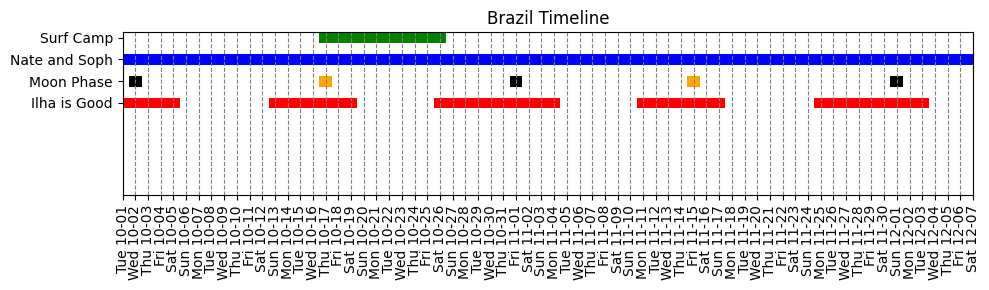

In [57]:
# Convert 'Date' to matplotlib date format
df_moon['DateNum'] = mdates.date2num(df_moon['Date'])
df_nate_and_soph['DateNum'] = mdates.date2num(df_nate_and_soph['Date'])
df_surf_camp['DateNum'] = mdates.date2num(df_surf_camp['Date'])
df_ilha_is_good['DateNum'] = mdates.date2num(df_ilha_is_good['Date'])

# Assuming a fixed duration for visualization, adjusted to start half a day earlier
duration = 1  # Duration of one day
half_day = 0.5  # Half day in Matplotlib's date format

# Prepare data for plotting with adjusted times
phases = {'New Moon': [], 'Full Moon': []}
for _, row in df_moon.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    phases[row['Phase']].append((start_date, duration))

# Prepare data for plotting Nate and Soph dates
nate_and_soph_dates = []
for _, row in df_nate_and_soph.iterrows():
    if row['Name'] == "Nate and Soph":
        start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
        nate_and_soph_dates.append((start_date, duration))

# Prepare data for plotting Surf Camp dates
surf_camp_dates = []
for _, row in df_surf_camp.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    surf_camp_dates.append((start_date, duration))

# Prepare data for plotting Ilha is Good dates
ilha_is_good_dates = []
for _, row in df_ilha_is_good.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    ilha_is_good_dates.append((start_date, duration))

# Plotting
fig, ax = plt.subplots(figsize=(10, 3))
colors = {'New Moon': 'black', 'Full Moon': 'orange', 'Nate and Soph': 'blue', 'Surf Camp': 'green', 'Ilha': 'red'}

# Plot moon phases
for phase, times in phases.items():
    ax.broken_barh(times, (10, 1), facecolors=colors[phase], label=phase)

# Plot Nate and Soph dates
ax.broken_barh(nate_and_soph_dates, (12, 1), facecolors=colors['Nate and Soph'], label='Nate and Soph')

# Plot Surf Camp dates
ax.broken_barh(surf_camp_dates, (14, 1), facecolors=colors['Surf Camp'], label='Surf Camp')

# Plot Ilha is Good dates
ax.broken_barh(ilha_is_good_dates, (8, 1), facecolors=colors['Ilha'], label='Ilha is Good')

# Formatting the plot
ax.set_yticks([])
#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set X-axis range
# Convert start and end dates to Matplotlib's date format
start_date = mdates.date2num(datetime(2024, 10, 1))
end_date = mdates.date2num(datetime(2024, 12, 7))

# Set the x-axis range to the specified dates
ax.set_xlim(start_date, end_date)
# Set Y-axis range
# Since your bars are at y=10 with a height of 1, setting the range from 0 to 15 gives some padding
ax.set_ylim(0, 15)


# Set major ticks locator to each day
ax.xaxis.set_major_locator(mdates.DayLocator())
# Set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %m-%d'))
# Set Y-axis tick positions
ax.set_yticks([10.5, 12.5, 14.5, 8.5])
# Set Y-axis tick labels
ax.set_yticklabels(['Moon Phase', 'Nate and Soph', 'Surf Camp', 'Ilha is Good'])

# Enable vertical grid lines for each day
ax.grid(True, which='major', axis='x', linestyle='--', color='gray')

# The rest of your plotting code remains unchanged
plt.xticks(rotation=90)
plt.title('Brazil Timeline')
plt.tight_layout()
plt.show()

In [58]:
import datetime

# Correctly convert the date string "2024-12-30" to a datetime object
date_obj = datetime.datetime.strptime("2024-12-30", "%Y-%m-%d")

# Correctly get the ordinal value of the date "2024-12-30"
ordinal_value = date_obj.toordinal()

# Now, use this correct ordinal value to convert back to a date, if needed
date_from_correct_ordinal = datetime.date.fromordinal(ordinal_value)

print(f"Correct ordinal value for '2024-12-30': {ordinal_value}")
print(f"Date from correct ordinal: {date_from_correct_ordinal}")

Correct ordinal value for '2024-12-30': 739250
Date from correct ordinal: 2024-12-30


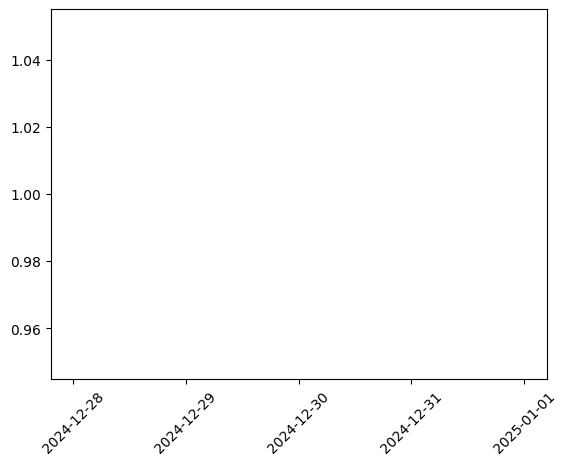

In [59]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Example date
date_obj = datetime.datetime.strptime("2024-12-30", "%Y-%m-%d")

# Assuming you have a list of dates and corresponding values
dates = [date_obj]
values = [1]  # Example value

fig, ax = plt.subplots()
ax.plot(dates, values)

# Format the x-axis to display dates in a readable format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

plt.xticks(rotation=45)  # Rotate dates for better readability
plt.show()

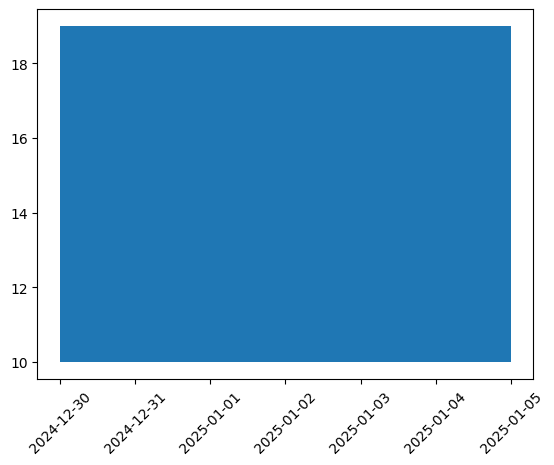

In [60]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Define start and end dates for periods
start_date = datetime.datetime.strptime("2024-12-30", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2025-01-05", "%Y-%m-%d")

# Convert dates to matplotlib's internal date format
start_num = mdates.date2num(start_date)
end_num = mdates.date2num(end_date)

# Calculate width as difference between start and end
width = end_num - start_num

# Define a list of periods for broken_barh (here, just one period)
periods = [(start_num, width)]

# Plotting
fig, ax = plt.subplots()
ax.broken_barh(periods, (10, 9), facecolors='tab:blue')  # (10, 9) is the y position and height of the bar

# Set the x-axis to use the DateFormatter
ax.xaxis_date()  # Tell matplotlib that the x-axis uses date format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)  # Rotate dates for better readability
plt.show()

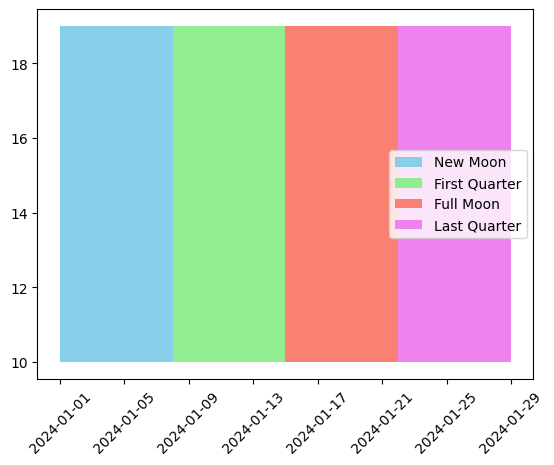

In [61]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Example moon phase data: [("2024-01-01", 7, 'New Moon'), ("2024-01-08", 7, 'First Quarter'), ...]
# Each tuple contains (start date, duration in days, phase name)
moon_phases = [
    ("2024-01-01", 7, 'New Moon'),
    ("2024-01-08", 7, 'First Quarter'),
    ("2024-01-15", 7, 'Full Moon'),
    ("2024-01-22", 7, 'Last Quarter')
]

# Convert start dates to matplotlib's date format and calculate end dates
periods = []
for start_date, duration, _ in moon_phases:
    start = mdates.date2num(datetime.datetime.strptime(start_date, "%Y-%m-%d"))
    end = start + duration
    periods.append((start, end - start))

# Plotting
fig, ax = plt.subplots()

# Assign different colors for each phase for visibility
colors = ['skyblue', 'lightgreen', 'salmon', 'violet']

for idx, (period, (_, _, phase_name)) in enumerate(zip(periods, moon_phases)):
    ax.broken_barh([period], (10, 9), facecolors=colors[idx % len(colors)], label=phase_name)

# Set the x-axis to use the DateFormatter
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.legend()
plt.show()